![QuantConnect Logo](https://cdn.quantconnect.com/web/i/icon.png)
<hr>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt



In [73]:
# Path to your Excel file
file_path = "data.csv"  # Replace with the path to your Excel file
df = pd.read_csv(file_path)

In [74]:
print(df)


          Time   Open   High    Low  Close    Volume
0   18/07/2024  34350  34400  33800  34350   9455794
1   19/07/2024  34700  35200  34500  34800  17269020
2   22/07/2024  34750  35050  34150  34650  10114811
3   23/07/2024  34650  34750  33850  33850  12724986
4   24/07/2024  33650  33900  31950  32900  21943775
5   25/07/2024  32300  32650  31800  31900  16467648
6   26/07/2024  32100  32300  31900  32100   7000649
7   29/07/2024  32350  32550  32200  32200   5701080
8   30/07/2024  32200  32400  31900  31950   5990599
9   31/07/2024  32200  32300  31700  31800   7855574
10    1/8/2024  32100  32100  30000  30300  23885264
11    2/8/2024  29850  31350  29750  31250  15351321
12    5/8/2024  30650  30800  29600  29600  22033037
13    6/8/2024  30300  31000  29650  30600  17114832
14    7/8/2024  30900  30900  30250  30600   6529593
15    8/8/2024  30300  30700  29900  30000  11143672
16    9/8/2024  30550  31600  30300  31300  14924769
17   12/8/2024  31600  32000  31200  32000  11

In [75]:
df['Date'] = pd.to_datetime(df['Time'])
df = df.sort_values('Date')

# Calculate the 20-period Exponential Moving Average (EMA20)
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

/tmp/ipykernel_47/2516953828.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Time'])


        Date  Close         EMA20
0 2024-07-18  34350  34350.000000
1 2024-07-19  34800  34392.857143
2 2024-07-22  34650  34417.346939
3 2024-07-23  33850  34363.313897
4 2024-07-24  32900  34223.950669


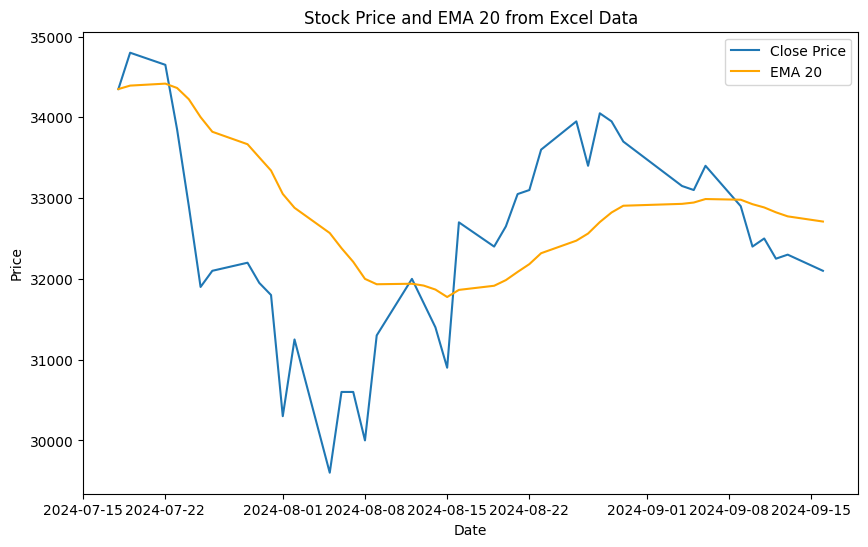

In [76]:
print(df[['Date', 'Close', 'EMA20']].head())

# Plot the 'Close' price and EMA20
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['EMA20'], label='EMA 20', color='orange')
plt.title('Stock Price and EMA 20 from Excel Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
from QuantConnect import *
from QuantConnect.Indicators import ExponentialMovingAverage

# Initialize QuantBook
qb = QuantBook()

# Add a security (e.g., SPY) to the QuantBook
spy = qb.AddEquity("SPY", Resolution.Daily)

# Fetch historical data from QuantConnect
history = qb.History(spy.Symbol, 60, Resolution.Daily)


20240917 07:54:04.880 TRACE:: Config.GetValue(): qb-data-hour - Using default value: 9
20240917 07:54:04.898 TRACE:: Config.Get(): Configuration key not found. Key: lean-manager-type - Using default value: LocalLeanManager
20240917 07:54:04.900 TRACE:: Config.Get(): Configuration key not found. Key: data-permission-manager - Using default value: DataPermissionManager
20240917 07:54:04.906 TRACE:: Config.GetValue(): zip-data-cache-provider - Using default value: 10
20240917 07:54:04.907 TRACE:: Config.Get(): Configuration key not found. Key: fundamental-data-provider - Using default value: CoarseFundamentalDataProvider
20240917 07:54:04.910 TRACE:: Config.GetValue(): algorithm-manager-time-loop-maximum - Using default value: 20
20240917 07:54:04.911 TRACE:: Config.GetValue(): storage-limit - Using default value: 10737418240
20240917 07:54:04.912 TRACE:: Config.GetValue(): storage-permissions - Using default value: 3
20240917 07:54:04.914 TRACE:: LocalObjectStore.Initialize(): Storage Ro

In [80]:
from datetime import datetime, timedelta

from datetime import datetime, timedelta
import pandas as pd

class MyCustomDataType:
    def __init__(self):
        self.time = None
        self.end_time = None
        self.value = None
        self.Property1 = None

    def get_source(self, file_path: str):
        # Read the CSV file
        self.data = pd.read_csv(file_path)
        return self.data

    def reader(self, line: str):
        line = line.strip()
        if not line or not line[0].isdigit():
            print(f"Line skipped or invalid: {line}")
            return None

        data = line.split(',')
        print(f"Data read: {data}")

        if len(data) < 3:
            print(f"Insufficient data in line: {line}")
            return None

        custom = MyCustomDataType()
        try:
            custom.time = datetime.strptime(data[0], '%Y%m%d')
            custom.end_time = custom.time + timedelta(1)
            custom.value = float(data[1])
            custom.Property1 = float(data[2])
            print(f"Custom data parsed successfully: {custom.__dict__}")
            return custom
        except ValueError as e:
            print(f"Error parsing data line: {line}. Exception: {e}")
            return None


In [77]:
class MyAlgorithm(QCAlgorithm):
    def Initialize(self):
        self.SetStartDate(datetime.now() - timedelta(days=2))
        self.SetEndDate(datetime.now())

        # Add data with resolution
        self.custom_data = self.AddData(MyCustomDataType, "SSI.csv", Resolution.MINUTE)
        self.Debug(f"Data added successfully: {self.custom_data}")

    def OnData(self, data):
        if not data.Bars:
            self.Debug("No bars in data")
            return

        for bar in data.Bars:
            self.Debug(f"Received bar: {bar.Value}")

        # Log the data content
        self.Debug(f"Data content: {data}")

In [78]:
file_path = 'data.csv'  # Replace with your local file path
custom_data = MyCustomDataType()
data = custom_data.get_source(file_path)

# Simulate reading each line
for index, row in data.iterrows():
    line = ','.join(map(str, row.values))
    custom_data.reader(line)

Data read: ['18/07/2024', '34350', '34400', '33800', '34350', '9455794']
Error parsing data line: 18/07/2024,34350,34400,33800,34350,9455794. Exception: time data '18/07/2024' does not match format '%d%m%Y'
Data read: ['19/07/2024', '34700', '35200', '34500', '34800', '17269020']
Error parsing data line: 19/07/2024,34700,35200,34500,34800,17269020. Exception: time data '19/07/2024' does not match format '%d%m%Y'
Data read: ['22/07/2024', '34750', '35050', '34150', '34650', '10114811']
Error parsing data line: 22/07/2024,34750,35050,34150,34650,10114811. Exception: time data '22/07/2024' does not match format '%d%m%Y'
Data read: ['23/07/2024', '34650', '34750', '33850', '33850', '12724986']
Error parsing data line: 23/07/2024,34650,34750,33850,33850,12724986. Exception: time data '23/07/2024' does not match format '%d%m%Y'
Data read: ['24/07/2024', '33650', '33900', '31950', '32900', '21943775']
Error parsing data line: 24/07/2024,33650,33900,31950,32900,21943775. Exception: time data '